<a href="https://colab.research.google.com/github/ShinichiKD/LabMachineLearning/blob/main/labSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Obtencion de datos


In [5]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

#generate 2D normally distributed data
X, y= make_gaussian_quantiles(cov=2.,
                                    n_samples=1000, n_features=2,
                                    n_classes=2, random_state=4)



##Manipulación



In [6]:
from sklearn.model_selection import train_test_split
#Creamos train y test sets
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size=0.3)
#Utilizando los datos de entrenamiento dividimos en train nuevamente y añadimos el set de validacion
train_X, validation_X, train_y, validation_y = train_test_split(train_X, train_y,
                                                    train_size=0.8,
                                                    test_size=0.2)

#Exploración


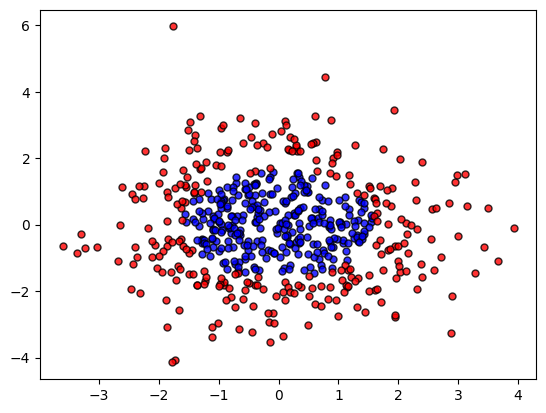

In [13]:
train_X_label_0 = train_X[train_y == 0]
train_X_label_1 = train_X[train_y == 1]

# Graficar los puntos con etiqueta 0 en azul
plt.scatter(train_X_label_0[:, 0], train_X_label_0[:, 1], marker='o', c='blue', s=25, edgecolor='k', alpha=0.8, label='Etiqueta 0')

# Graficar los puntos con etiqueta 1 en rojo
plt.scatter(train_X_label_1[:, 0], train_X_label_1[:, 1], marker='o', c='red', s=25, edgecolor='k', alpha=0.8, label='Etiqueta 1')
plt.show()

##Modelamiento

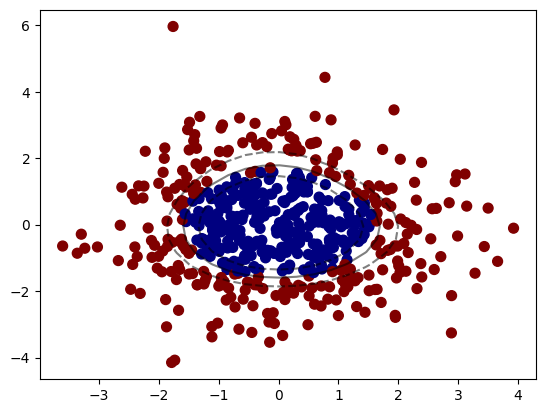

In [20]:
from sklearn.svm import SVC
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



model = SVC(kernel='rbf', class_weight='balanced')
model.fit(train_X, train_y)
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=50, cmap='jet')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

##Interpretación

In [35]:

from sklearn.metrics import classification_report
yfit = model.predict(test_X)
print("Primer modelo generado")
print(classification_report(test_y, yfit))
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
}
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(train_X, train_y)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

yfit = best_model.predict(test_X)
print("Mejor modelo encontrado")
print(classification_report(test_y, yfit))
best_params

Primer modelo generado
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       144
           1       1.00      0.97      0.98       156

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Mejor modelo encontrado
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       144
           1       1.00      0.99      1.00       156

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



{'C': 10, 'gamma': 0.1}

Como se puede observar del primer modelo generado para el valor 0 su precision era del 97% y al buscar exhaustivamente los mejores parametros pudimos mejorar su precision, ademas de obtener una accuracy del 100%, tambien al mostrar los mejores parametros encontados, podemos ver que el parametro C tal vez no sea el mejor valor, ya que este se encuentra en los limites de su array y segun lo dicho en clases cuando esto ocurre lo ideal seria buscar con valores mas grandes o mas pequeños segun corresponda.